In [1]:
import numpy as np

In [2]:
def loadDataSet():
    data = []
    label = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        l = line.strip().split()
        data.append([1.0, float(l[0]), float(l[1])])
        label.append(int(l[2]))
    return data, label

In [3]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [4]:
def gradAscent(data, label):
    data = np.mat(data)
    label = np.mat(label).transpose()
    m, n = data.shape
    w = np.ones((n, 1))
    alpha = 0.001
    step = 500
    for i in range(step):
        z = sigmoid(data * w)
        error = (label - z)   #error.shape = m,1
        w = w + alpha * data.transpose() * error  #data.shape = m, n
    return w

In [5]:
#plot
import matplotlib.pyplot as plt
def plotBestFit(w):
    data, label = loadDataSet()
    data = np.array(data)
    m, n = data.shape
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(m):
        if int(label[i]) == 1:
            x1.append(data[i,1])
            y1.append(data[i,2])  #bias 在 0 处
        else:
            x2.append(data[i,1])
            y2.append(data[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x1, y1, s=30, c='red', marker='s')
    ax.scatter(x2, y2, s=30, c='blue')
    x = np.arange(-3.0, 3.0, 0.1)
    y = np.array((-w[0] - w[1] * x) / w[2])
    ax.plot(x, y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [6]:
data, label = loadDataSet()
w = gradAscent(data, label)

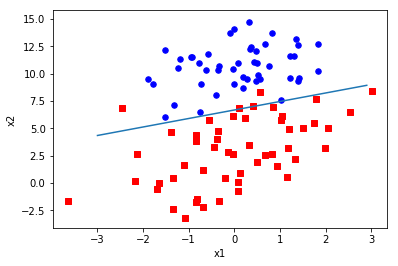

In [7]:
plotBestFit(w.getA())  #将mat转换为array

In [8]:
#随机梯度上升
def stocGradAscent(data, label):
    data = np.array(data)
#     label = np.mat(label)
    m, n = data.shape
    alpha = 0.01
    w = np.ones(n)
    for i in range(m):
        z = sigmoid(sum(data[i] * w))
        error = label[i] - z
        w = w + alpha * error * data[i]
    return w

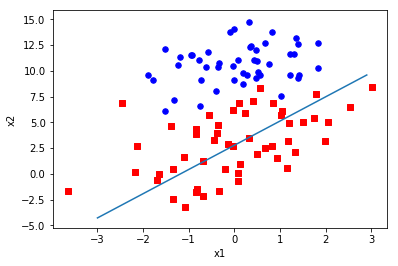

In [9]:
stocW = stocGradAscent(data, label)
plotBestFit(stocW)

In [10]:
def stocGradAscentPro(data, label, numIter = 150):
    data = np.array(data)
    m, n = data.shape
    w = np.ones(n)
    for i in range(numIter):
        dataIndex = list(range(m))
        for j in range(m):
            alpha = 4 / (1.0 + i + j) + 0.01    #动态更新学习速率，退火
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(data[randIndex] * w))
            error = label[randIndex] - h
            w = w + alpha * error * data[randIndex]
            del(dataIndex[randIndex])
    return w

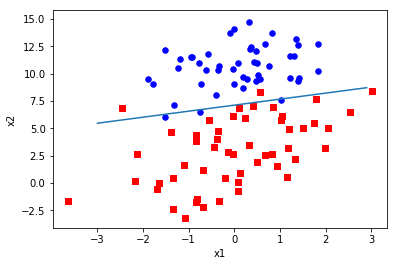

In [11]:
wPro = stocGradAscentPro(data, label)
plotBestFit(wPro)

In [12]:
#horse

#分类
def predict(data, w):
    prob = sigmoid(sum(data * w))
    if prob > 0.5:
        return 1
    else:
        return 0

In [13]:
def colicTest():
    train = open('horseColicTraining.txt')
    test = open('horseColicTest.txt')
    
    trainSet = []
    trainLabel = []
    
    #将训练数据放入trainSet、trainLabel中
    for line in train.readlines():
        cline = line.strip().split('\t')
        lineArr = []
        for i in range(21):   #21个特征
            lineArr.append(float(cline[i]))
        trainSet.append(lineArr)
        trainLabel.append(lineArr)
        
    trainW = stocGradAscentPro(np.array(trainSet), trainLabel, 10)
    errorCnt = 0    #错误计数
    numTestVec = 0.0   #统计有多少个测试数据
    
    #将测试数据逐个进行预测
    for line in test.readlines():
        numTestVec += 1.0
        cline = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(cline[i]))
        if int(predict(np.array(lineArr), trainW)) != int(cline[21]):
            errorCnt += 1
    errorRate = (float(errorCnt)/numTestVec)
    print("the error rate of this is : %f" %errorRate)
    return errorRate

In [14]:
def muliTest():
    numTests = 10
    errorCnt = 0.0
    for k in range(numTests):
        errorCnt += colicTest()
    print("after %d iteration the average error rate is : %f"%(numTests,errorCnt/float(numTests)))

In [15]:
muliTest()

the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
the error rate of this is : 0.298507
after 10 iteration the average error rate is : 0.298507
